# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../../../desktop/PIAIC/compressive_strength_concrete.csv")
dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
dataset.isnull().sum().sum()

0

In [4]:
dataset.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df = pd.DataFrame(dataset.dtypes)
df.reset_index()

,index,0
0,Cement (component 1)(kg in a m^3 mixture),float64
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,float64
2,Fly Ash (component 3)(kg in a m^3 mixture),float64
3,Water (component 4)(kg in a m^3 mixture),float64
4,Superplasticizer (component 5)(kg in a m^3 mix...,float64
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,float64
6,Fine Aggregate (component 7)(kg in a m^3 mixture),float64
7,Age (day),int64
8,"Concrete compressive strength(MPa, megapascals)",float64


In [6]:
# Splitting our data in data and labels
data = dataset.iloc[:, :8]
labels = dataset.iloc[:, 8]

In [7]:
data.head(4)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365


In [8]:
labels.head(4)

0    79.99
1    61.89
2    40.27
3    41.05
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [9]:
# Splitting data in training and test sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.3, random_state = 42)
len(train_data), len(test_data), len(train_labels), len(test_labels)

(721, 309, 721, 309)

In [10]:
# standardizing our dataset
mean = np.mean(train_data, axis = 0)
std = np.std(train_data, axis = 0)

train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

In [11]:
test_data.head(4)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
31,-0.170036,0.445233,-0.816913,2.184748,-1.013995,-0.532771,-1.269355,5.177091
109,0.722054,1.300843,-0.816913,-0.799595,0.905833,-0.370895,-0.197798,-0.633845
136,0.974167,1.300843,-0.816913,-1.698208,2.627059,-0.370895,-0.197798,-0.292980
88,0.722054,1.300843,-0.816913,-0.799595,0.905833,-0.370895,-0.197798,-0.698772


In [12]:
# Splitting data in validation set also
par_train_data, val_data, par_train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state = 42)
len(par_train_data), len(val_data), len(par_train_labels), len(val_labels)

(576, 145, 576, 145)

In [13]:
par_train_data.head(4)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
202,-0.865423,-0.855296,1.152821,-0.932022,0.276924,1.481126,0.404173,0.161506
437,-1.024263,-0.283748,1.908356,-0.804324,0.061771,0.412996,0.273038,-0.292980
732,0.596460,-0.855296,-0.816913,0.482112,-1.013995,1.047756,0.466618,-0.633845
539,1.806231,-0.855296,-0.816913,0.482112,-1.013995,-0.479237,-0.742318,0.713383


In [91]:
# Building a model

# Setting up a random seed
tf.random.set_seed(42)

# Setting up Early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience = 20)

# 1. Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation = "relu",
                          input_shape = (par_train_data.shape[1],)),
    tf.keras.layers.Dense(1)
])

# 2. Compilinng our model
model.compile(loss = tf.keras.losses.mse,
             optimizer = tf.keras.optimizers.Adam(0.01),
             metrics = ['mae'])

# 3. Fitting our model
history = model.fit(par_train_data,
                   par_train_labels,
                   epochs = 250,
                   validation_data = (val_data, val_labels),
                   callbacks = callback)


Epoch 1/250
18/18 [==============================] - 0s 9ms/step - loss: 1339.3231 - mae: 32.7213 - val_loss: 772.8038 - val_mae: 23.2109
Epoch 2/250
18/18 [==============================] - 0s 2ms/step - loss: 558.2018 - mae: 19.5605 - val_loss: 228.8660 - val_mae: 11.9130
Epoch 3/250
18/18 [==============================] - 0s 2ms/step - loss: 217.7131 - mae: 11.2581 - val_loss: 180.2396 - val_mae: 10.7419
Epoch 4/250
18/18 [==============================] - 0s 3ms/step - loss: 175.3264 - mae: 10.5906 - val_loss: 162.1813 - val_mae: 10.2206
Epoch 5/250
18/18 [==============================] - 0s 3ms/step - loss: 156.6692 - mae: 10.2888 - val_loss: 156.6697 - val_mae: 9.9570
Epoch 6/250
18/18 [==============================] - 0s 2ms/step - loss: 145.1393 - mae: 9.6531 - val_loss: 148.6608 - val_mae: 9.7136
Epoch 7/250
18/18 [==============================] - 0s 3ms/step - loss: 128.9318 - mae: 9.4069 - val_loss: 144.7362 - val_mae: 9.5285
Epoch 8/250
18/18 [==========================

Epoch 62/250
18/18 [==============================] - 0s 2ms/step - loss: 19.7819 - mae: 3.3599 - val_loss: 28.0927 - val_mae: 4.0238
Epoch 63/250
18/18 [==============================] - 0s 2ms/step - loss: 23.0330 - mae: 3.6131 - val_loss: 28.2301 - val_mae: 4.0091
Epoch 64/250
18/18 [==============================] - 0s 2ms/step - loss: 20.2465 - mae: 3.4515 - val_loss: 30.3652 - val_mae: 4.0624
Epoch 65/250
18/18 [==============================] - 0s 2ms/step - loss: 18.2457 - mae: 3.2918 - val_loss: 29.8232 - val_mae: 3.9511
Epoch 66/250
18/18 [==============================] - 0s 2ms/step - loss: 21.5991 - mae: 3.4442 - val_loss: 31.7557 - val_mae: 4.2436
Epoch 67/250
18/18 [==============================] - 0s 2ms/step - loss: 21.8592 - mae: 3.5997 - val_loss: 29.0764 - val_mae: 4.0622
Epoch 68/250
18/18 [==============================] - 0s 2ms/step - loss: 21.2776 - mae: 3.5121 - val_loss: 27.9282 - val_mae: 4.0060
Epoch 69/250
18/18 [==============================] - 0s 2ms/s

Epoch 123/250
18/18 [==============================] - 0s 2ms/step - loss: 14.2329 - mae: 2.9156 - val_loss: 24.7884 - val_mae: 3.8408
Epoch 124/250
18/18 [==============================] - 0s 3ms/step - loss: 14.6134 - mae: 3.0153 - val_loss: 22.5482 - val_mae: 3.5172
Epoch 125/250
18/18 [==============================] - 0s 2ms/step - loss: 13.1018 - mae: 2.7876 - val_loss: 25.1470 - val_mae: 3.7516
Epoch 126/250
18/18 [==============================] - 0s 2ms/step - loss: 13.3439 - mae: 2.8372 - val_loss: 27.0976 - val_mae: 3.8111
Epoch 127/250
18/18 [==============================] - 0s 2ms/step - loss: 16.0660 - mae: 3.0966 - val_loss: 23.8516 - val_mae: 3.6002
Epoch 128/250
18/18 [==============================] - 0s 2ms/step - loss: 11.9465 - mae: 2.6277 - val_loss: 23.0831 - val_mae: 3.5352
Epoch 129/250
18/18 [==============================] - 0s 2ms/step - loss: 12.5654 - mae: 2.6825 - val_loss: 24.2085 - val_mae: 3.7543
Epoch 130/250
18/18 [==============================] - 

Epoch 184/250
18/18 [==============================] - 0s 3ms/step - loss: 10.7185 - mae: 2.5326 - val_loss: 21.9026 - val_mae: 3.5513
Epoch 185/250
18/18 [==============================] - 0s 2ms/step - loss: 11.9019 - mae: 2.5343 - val_loss: 22.3530 - val_mae: 3.6558
Epoch 186/250
18/18 [==============================] - 0s 3ms/step - loss: 10.7705 - mae: 2.4664 - val_loss: 24.2595 - val_mae: 3.5617
Epoch 187/250
18/18 [==============================] - 0s 2ms/step - loss: 11.9822 - mae: 2.5528 - val_loss: 23.7475 - val_mae: 3.5792
Epoch 188/250
18/18 [==============================] - 0s 2ms/step - loss: 11.2758 - mae: 2.5321 - val_loss: 22.6312 - val_mae: 3.4470
Epoch 189/250
18/18 [==============================] - 0s 2ms/step - loss: 10.8120 - mae: 2.4927 - val_loss: 24.5111 - val_mae: 3.6566
Epoch 190/250
18/18 [==============================] - 0s 2ms/step - loss: 12.0382 - mae: 2.6775 - val_loss: 25.4816 - val_mae: 3.7539
Epoch 191/250
18/18 [==============================] - 

In [93]:
# 4. Evaluating our model
model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 26.6315 - mae: 3.7813


[26.631507873535156, 3.781329393386841]

<AxesSubplot:>

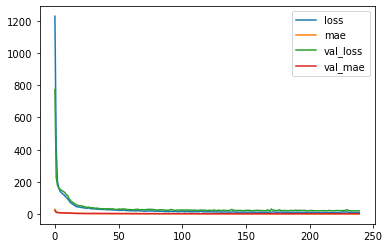

In [109]:
# Visualizing our models performance
pd.DataFrame(history.history).plot()

In [108]:
# 5. Making predicitions
pred_labels = model.predict(test_data)
# pred_labels.squeeze().shape
# test_data.squeeze().shape

(309, 8)

In [25]:
# Checking the accuracy of our model
# pd.DataFrame(test_labels - pred_labels.squeeze()).plot()

In [137]:
pred_labels

array([[52.767315 ],
       [41.033283 ],
       [75.212875 ],
       [35.145092 ],
       [12.881099 ],
       [47.435364 ],
       [28.475996 ],
       [51.539703 ],
       [34.674114 ],
       [43.995667 ],
       [39.003567 ],
       [ 7.516578 ],
       [50.266552 ],
       [44.76596  ],
       [31.250612 ],
       [23.924452 ],
       [39.421585 ],
       [19.473463 ],
       [32.77107  ],
       [32.486427 ],
       [33.73628  ],
       [35.503845 ],
       [47.727596 ],
       [10.210981 ],
       [32.910492 ],
       [40.02496  ],
       [ 5.7034316],
       [49.306637 ],
       [55.15701  ],
       [14.516637 ],
       [41.036987 ],
       [35.952263 ],
       [49.067165 ],
       [55.015835 ],
       [19.517595 ],
       [39.23503  ],
       [34.08547  ],
       [43.7917   ],
       [10.671263 ],
       [55.378887 ],
       [16.267838 ],
       [ 4.32562  ],
       [34.339607 ],
       [49.19034  ],
       [11.18803  ],
       [71.97327  ],
       [51.570538 ],
       [34.95